**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)? 
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - How do you make "+" operator work for your class?
 - What package can you use in python for symbolic calculations?


## Estimated max time needed: 6 hours  

### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [2]:
def fibonnaci(n):
    a = 0
    b = 1
    fib_list = [0, 1]
    for i in range(2, n):
        c = a + b
        fib_list.append(c)
        a = b
        b = c
    return fib_list

In [6]:
fibonnaci(20)

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181]

In [1]:
print(4)

4


### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

### **Problem3:**

Write a decorator that calls a function twice.

### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many fields of science: namely the fields of electromagnetism, astronomy and fluid dynamics. 

The equation has the form: 

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100, 
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_field[i,j]=0.25*(field[i,j-1]+field[i,j+1]+field[i+1,j]+field[i-1,j])
```
 - Think of how to avoid using the loop to do these calculations.

![](jacobiFigure1.jpg)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def laplace(nx):
    grid = np.zeros((nx, nx))
    for i in range(nx):
        grid[i, 0] = 10*i
    for j in range(1, nx):
        grid[-1, j] = 10*(nx - 1) - 10*j
    grid[1:-1, 1:-1] = 0.5

    new_grid = np.zeros((nx, nx))
    for i in range(nx):
        new_grid[i, 0] = 10*i
    for j in range(1, nx):
        new_grid[-1, j] = 10*(nx - 1) - 10*j
    new_grid[1:-1, 1:-1] = 0.5

    m, n = grid.shape

    N = 100
    for k in range(N):
        for i in range(1, m-1):
            for j in range(1, n-1):
                new_grid[i,j] = 0.25*(grid[i,j-1]+grid[i,j+1]+grid[i+1,j]+grid[i-1,j])
        grid, new_grid = new_grid, grid

    x = plt.imshow(grid)
    return x

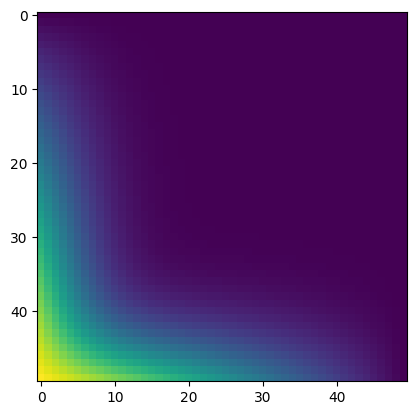

In [109]:
laplace(50)